In [2]:
import yfinance as yf
import datetime 
import pandas as pd

def get_stock_data(ticker, start_date, end_date):
    """
    Retrieve stock data for a given ticker and date range.

    :param ticker: The stock ticker symbol.
    :param start_date: The start date for the data retrieval.
    :param end_date: The end date for the data retrieval.
    :return: A pandas DataFrame containing the stock data.
    """
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# Example usage
ticker = "QQQ3.MI"
start_date = "2006-01-01"
end_date = "2025-07-31"

stock_data = get_stock_data(ticker, start_date, end_date)


C:\Users\mathi\AppData\Local\Temp\ipykernel_14452\1371439489.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


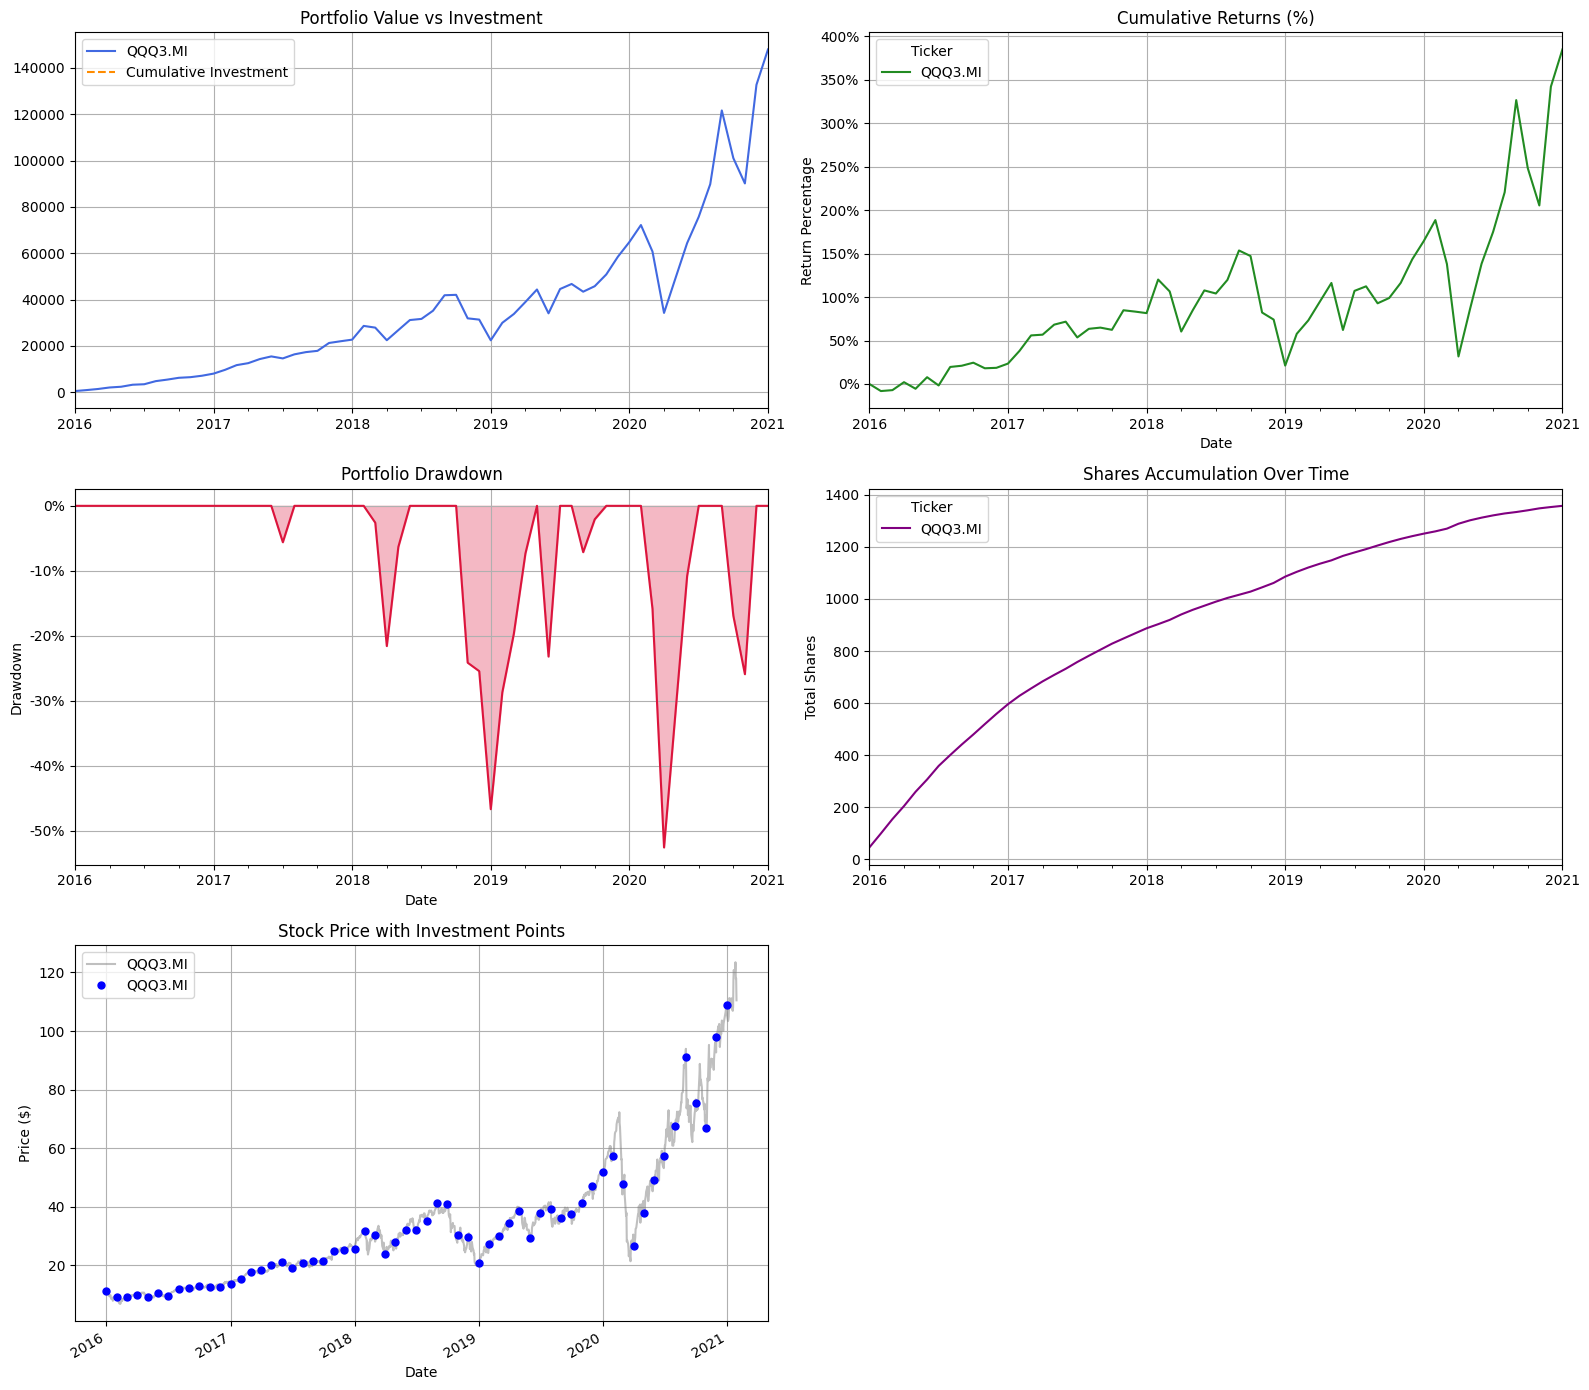


----------------- KEY STATISTICS -----------------
Total Investment: $30,500.00
Final Portfolio Value: $147,961.55
Total Shares Accumulated: 1,357.94
Average Purchase Price: $22.46
Total Return: 385.12%
Annualized Return: 36.43%
Highest Single Month Return: 83.65%
Worst Drawdown: -52.57%


{'total_investment': 30500,
 'final_value': 147961.5512904399,
 'total_shares': 1357.9437640755746,
 'average_purchase_price': 22.460429368931187,
 'total_return_pct': 385.11984029652433,
 'annualized_return': 0.3643353188756797,
 'monthly_returns': Ticker       QQQ3.MI
 Date                
 2016-02-01  0.836467
 2016-03-01  0.517484
 2016-04-01  0.464710
 2016-05-01  0.157239
 2016-06-01  0.368789
 2016-07-01  0.063961
 2016-08-01  0.390473
 2016-09-01  0.138239
 2016-10-01  0.143292
 2016-11-01  0.043177
 2016-12-01  0.095700
 2017-01-01  0.127869
 2017-02-01  0.204698
 2017-03-01  0.209410
 2017-04-01  0.072608
 2017-05-01  0.140670
 2017-06-01  0.080448
 2017-07-01 -0.056015
 2017-08-01  0.120439
 2017-09-01  0.059056
 2017-10-01  0.031503
 2017-11-01  0.190417
 2017-12-01  0.034854
 2018-01-01  0.031641
 2018-02-01  0.261338
 2018-03-01 -0.025958
 2018-04-01 -0.194872
 2018-05-01  0.194587
 2018-06-01  0.161714
 2018-07-01  0.015748
 2018-08-01  0.111437
 2018-09-01  0.190114
 20

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def test_strat_graphs(startDate, endDate, stock_data, monthlyInvestment):
    # Filter data for the specified date range
    data_range = stock_data.loc[startDate:endDate].resample('MS').first()
    
    # Calculate total investment and shares
    total_investment = monthlyInvestment * len(data_range)
    shares_purchased = monthlyInvestment / data_range['Open']
    total_shares = shares_purchased.sum()
    average_purchase_price = total_investment / total_shares
    
    # Calculate portfolio metrics
    cumulative_investment = np.cumsum([monthlyInvestment] * len(data_range))
    portfolio_value = shares_purchased.cumsum() * data_range['Open'].to_numpy()

    cumulative_returns = (portfolio_value - cumulative_investment[:,np.newaxis]) / cumulative_investment[:,np.newaxis]
    monthly_returns = portfolio_value.pct_change().dropna()
    
    # Calculate performance statistics
    final_value = portfolio_value.iloc[-1]
    total_return_pct = (final_value - total_investment) / total_investment * 100
    annualized_return = (final_value / total_investment) ** (12/len(data_range)) - 1
    
    # Calculate drawdown
    peak = portfolio_value.cummax()
    drawdown = ((portfolio_value - peak) / peak).squeeze()
    
    # Set up figure
    plt.figure(figsize=(16, 14))
    
    # Portfolio Value vs Investment
    ax1 = plt.subplot(3, 2, 1)
    portfolio_value.plot(ax=ax1, color='royalblue', label='Portfolio Value')
    ax1.plot(cumulative_investment, '--', color='darkorange', label='Cumulative Investment')
    ax1.set_title('Portfolio Value vs Investment', fontsize=12)
    ax1.set_xlabel('')
    ax1.legend()
    ax1.grid(True)
    
    # Cumulative Returns
    ax2 = plt.subplot(3, 2, 2)
    cumulative_returns.plot(ax=ax2, color='forestgreen')
    ax2.set_title('Cumulative Returns (%)', fontsize=12)
    ax2.set_ylabel('Return Percentage')
    ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
    ax2.grid(True)
    
    # Drawdown
    ax3 = plt.subplot(3, 2, 3)
    drawdown.plot(ax=ax3, color='crimson')
    ax3.fill_between(drawdown.index, drawdown.values, color='crimson', alpha=0.3)
    ax3.set_title('Portfolio Drawdown', fontsize=12)
    ax3.set_ylabel('Drawdown')
    ax3.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0%}'))
    ax3.grid(True)
    
    
    # Shares Accumulation
    ax5 = plt.subplot(3, 2, 4)
    shares_purchased.cumsum().plot(ax=ax5, color='purple')
    ax5.set_title('Shares Accumulation Over Time', fontsize=12)
    ax5.set_xlabel('')
    ax5.set_ylabel('Total Shares')
    ax5.grid(True)
    
    # Stock Price with Investment Points
    ax6 = plt.subplot(3, 2, 5)
    stock_data['Close'].loc[startDate:endDate].plot(ax=ax6, color='gray', alpha=0.5, label='Daily Price')
    data_range['Open'].plot(ax=ax6, style='o', markersize=5, color='blue', label='Investment Points')
    ax6.set_title('Stock Price with Investment Points', fontsize=12)
    ax6.set_ylabel('Price ($)')
    ax6.legend()
    ax6.grid(True)
    
    plt.tight_layout()
    plt.show()
    

    # Print key statistics
    print(f"\n{' KEY STATISTICS ':-^50}")
    print(f"Total Investment: ${total_investment:,.2f}")
    print(f"Final Portfolio Value: ${final_value.values[0]:,.2f}")
    print(f"Total Shares Accumulated: {total_shares.values[0]:,.2f}")
    print(f"Average Purchase Price: ${average_purchase_price.values[0]:,.2f}")
    print(f"Total Return: {total_return_pct.values[0]:.2f}%")
    print(f"Annualized Return: {annualized_return.values[0]:.2%}")
    print(f"Highest Single Month Return: {monthly_returns.max().values[0]:.2%}")
    print(f"Worst Drawdown: {drawdown.min():.2%}")
    
    return {
        'total_investment': total_investment,
        'final_value': final_value.values[0],
        'total_shares': total_shares.values[0],
        'average_purchase_price': average_purchase_price.values[0],
        'total_return_pct': total_return_pct.values[0],
        'annualized_return': annualized_return.values[0],
        'monthly_returns': monthly_returns,
        'drawdown': drawdown
    }

# Usage example
startDate = '2016-01-01'
endDate = '2021-01-31'
monthlyInvestment = 500
test_strat_graphs(startDate, endDate, stock_data, monthlyInvestment)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FuncFormatter

def test_strat(startDate, endDate, stock_data, monthlyInvestment):
    # Filter data for the specified date range
    data_range = stock_data.loc[startDate:endDate].resample('MS').first()
    
    # Calculate total investment and shares
    total_investment = monthlyInvestment * len(data_range)
    shares_purchased = monthlyInvestment / data_range['Open']
    total_shares = shares_purchased.sum()
    average_purchase_price = total_investment / total_shares
    
    # Calculate portfolio metrics
    cumulative_investment = np.cumsum([monthlyInvestment] * len(data_range))
    portfolio_value = shares_purchased.cumsum() * data_range['Open'].to_numpy()

    cumulative_returns = (portfolio_value - cumulative_investment[:,np.newaxis]) / cumulative_investment[:,np.newaxis]
    monthly_returns = portfolio_value.pct_change().dropna()
    
    # Calculate performance statistics
    final_value = portfolio_value.iloc[-1]
    total_return_pct = (final_value - total_investment) / total_investment * 100
    annualized_return = (final_value / total_investment) ** (12/len(data_range)) - 1
    
    # Calculate drawdown
    peak = portfolio_value.cummax()
    drawdown = ((portfolio_value - peak) / peak).squeeze()
    
    
    return {
        'total_investment': total_investment,
        'final_value': final_value.values[0],
        'total_shares': total_shares.values[0],
        'average_purchase_price': average_purchase_price.values[0],
        'total_return_pct': total_return_pct.values[0],
        'annualized_return': annualized_return.values[0],
        'monthly_returns': monthly_returns.to_numpy().squeeze(),
        'drawdown': drawdown.to_numpy().squeeze()
    }



from dateutil.relativedelta import relativedelta

def compare_strats(investmentPeriods, stock1, stock2, monthlyInvestment):
    res1 = pd.DataFrame([], columns= ['total_investment','final_value','total_shares','average_purchase_price','total_return_pct','annualized_return','monthly_returns','drawdown'])
    res2 = pd.DataFrame([], columns= ['total_investment','final_value','total_shares','average_purchase_price','total_return_pct','annualized_return','monthly_returns','drawdown'])

    startDate = min(stock1.index.min(), stock2.index.min())
    
    endDate = pd.to_datetime(startDate) + relativedelta(months=investmentPeriods)
    while endDate < pd.to_datetime(end_date):
        res1.loc[startDate] = test_strat(startDate, endDate, stock1, monthlyInvestment)
        res2.loc[startDate] = test_strat(startDate, endDate, stock2, monthlyInvestment)
        startDate = startDate + relativedelta(months=6)
        endDate = endDate + relativedelta(months=6)

    return res1, res2


# Usage example
startDate = '2014-01-01'
investmentPeriods = 4*12
stock1 = stock_data
stock2 = get_stock_data('NDX', startDate, endDate) 

monthlyInvestment = 500
res1, res2 = compare_strats(investmentPeriods, stock1, stock2, monthlyInvestment)

Price,Close,High,Low,Open,Volume
Ticker,QQQ3.MI,QQQ3.MI,QQQ3.MI,QQQ3.MI,QQQ3.MI
Date,,,,,
2014-04-23,4.917420,5.032170,4.934380,5.032170,4723
2014-04-24,5.043980,5.146920,4.885030,5.116640,3171
2014-04-25,4.810550,4.876550,4.766040,4.876550,8687
2014-04-28,4.799050,4.885330,4.813880,4.833260,8456
2014-04-30,4.912580,4.931960,4.915610,4.915610,5615
...,...,...,...,...,...
2025-07-24,224.339996,225.199997,222.000000,224.000000,10778
2025-07-25,225.970001,226.000000,223.850006,224.940002,17784


In [34]:
# Usage example
ticker1 = "QQQ3.MI"
ticker2 = 'NDX'
start_date = "2006-01-01"
end_date = "2025-07-31"



startDate = '2014-01-01'        # strartDate for testing the DCA strategy
investmentPeriods = 4*12
stock1 = get_stock_data(ticker1,start_date, end_date)
stock2 = get_stock_data(ticker2,start_date, end_date)

monthlyInvestment = 500
res1, res2 = compare_strats(investmentPeriods, stock1, stock2, monthlyInvestment)

C:\Users\mathi\AppData\Local\Temp\ipykernel_14452\1371439489.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\mathi\AppData\Local\Temp\ipykernel_14452\1371439489.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

2014-04-23 00:00:00


IndexError: single positional indexer is out-of-bounds

In [28]:
stock2

Price,Close,High,Low,Open,Volume
Ticker,NDX,NDX,NDX,NDX,NDX
Date,,,,,
2020-02-11,9517.860352,9517.860352,9517.860352,9517.860352,0
2020-02-12,9613.200195,9613.200195,9613.200195,9613.200195,0
2020-02-13,9595.700195,9595.700195,9595.700195,9595.700195,0
2020-02-14,9623.580078,9623.580078,9623.580078,9623.580078,0
2020-02-18,9629.799805,9629.799805,9629.799805,9629.799805,0
...,...,...,...,...,...
2025-07-24,23219.859375,23219.859375,23219.859375,23219.859375,0
2025-07-25,23272.250000,23272.250000,23272.250000,23272.250000,0


In [26]:
res1['annualized_return'].mean()

0.21509898634947125

In [25]:
res1

,total_investment,final_value,total_shares,average_purchase_price,total_return_pct,annualized_return,monthly_returns,drawdown
2014-01-01,22500,53405.153984,2106.856728,10.679416,137.356240,0.259235,"[0.9927208981140836, 0.6341283656625316, 0.440...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2014-07-01,24000,61572.819057,1925.286565,12.465677,156.553413,0.265594,"[1.003259685284748, 0.7218739957949929, 0.2803...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2015-01-01,24000,47814.736278,1619.790914,14.816727,99.228068,0.188058,"[0.99457678328042, 0.7329606496017322, 0.23204...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.15..."
2015-07-01,24500,54958.094805,1454.540414,16.843808,124.318754,0.218783,"[1.0858395147966289, 0.21536277181122565, 0.40...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.020047964879..."
2016-01-01,24000,58450.828821,1241.463942,19.332015,143.545120,0.249237,"[0.8364672624389549, 0.5174835211154738, 0.464...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2016-07-01,24500,58126.342325,1014.962651,24.138819,137.250377,0.235627,"[1.2451098989655693, 0.4791089176074994, 0.352...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2017-01-01,24000,77933.703180,794.917406,30.191816,224.723763,0.342389,"[1.1423823365669152, 0.6244534249501938, 0.317...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2017-07-01,24500,97944.701214,650.708865,37.651247,299.774291,0.404052,"[1.086163965350098, 0.5078140305765355, 0.3205...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2018-01-01,24000,115305.670339,528.512955,45.410429,380.440293,0.480505,"[1.2393040857671913, 0.403141247830622, 0.1054...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2018-07-01,24500,29368.539676,452.519861,54.141270,19.871591,0.045388,"[1.0956347890797633, 0.6530783246184535, 0.280...","[0.0, 0.0, 0.0, 0.0, -0.027892904693298203, 0...."


In [ ]:
# create DCA website, where you can compare various investment
# information on how best to rate strategies
# compare to risk free rate
